<a href="https://colab.research.google.com/github/julianafalves/Credit-Risk-Modeling/blob/main/CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

## Import Libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
loan_df = pd.read_csv('/content/drive/MyDrive/Credit Risk Score/loan_data_2007_2014.csv')

<ipython-input-6-8cd1ca3792f4>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('/content/drive/MyDrive/Credit Risk Score/loan_data_2007_2014.csv')


In [7]:
loan_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Preprocessing


In [9]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
loan_df['emp_lenght_int'] = loan_df['emp_length'].str.replace('years', '')
loan_df['emp_lenght_int'] = loan_df['emp_lenght_int'].str.replace('year', '')
loan_df['emp_lenght_int'] = loan_df['emp_lenght_int'].str.replace('\+','')
loan_df['emp_lenght_int'] = loan_df['emp_lenght_int'].str.replace('< 1', str(0))
loan_df['emp_lenght_int'] = loan_df['emp_lenght_int'].str.replace('n/a', str(0))


<ipython-input-10-101b512241d3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_df['emp_lenght_int'] = loan_df['emp_lenght_int'].str.replace('\+','')


In [11]:
loan_df['emp_lenght_int']

0         10 
1          0 
2         10 
3         10 
4          1 
         ... 
466280     4 
466281    10 
466282     7 
466283     3 
466284    10 
Name: emp_lenght_int, Length: 466285, dtype: object

In [12]:
loan_df['emp_lenght_int'] = pd.to_numeric(loan_df['emp_lenght_int'])

Changing term

In [13]:
loan_df['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [14]:
loan_df['term_int'] = loan_df['term'].str.replace('months','')
loan_df['term_int'] = loan_df['term_int'].str.replace('months','')
loan_df['term_int'] = pd.to_numeric(loan_df['term_int'])
loan_df['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

#### Changing the earliest_cr_line


In [15]:
loan_df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [16]:
loan_df['earliest_cr_line_date'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')

In [17]:
loan_df['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [18]:
loan_df['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_df['earliest_cr_line_date'])/np.timedelta64(1,'M')))
loan_df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

There is negative values in ['mths_since_earliest_cr_line'], I will analyze what is happening.

In [19]:
loan_df.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_df['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [20]:
loan_df['mths_since_earliest_cr_line'][loan_df['mths_since_earliest_cr_line']<0]=loan_df['mths_since_earliest_cr_line'].max()

<ipython-input-20-7ec976baae72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['mths_since_earliest_cr_line'][loan_df['mths_since_earliest_cr_line']<0]=loan_df['mths_since_earliest_cr_line'].max()


In [21]:
loan_df['mths_since_earliest_cr_line'].min()

73.0

####Issue date variable

In [22]:
loan_df['mths_since_last_issue_d'] = pd.to_datetime(loan_df['issue_d'],format = '%b-%y')
loan_df['mths_since_last_issue_d'] = round((pd.to_datetime('2017-12-01') - loan_df['mths_since_last_issue_d'])/np.timedelta64(1,'M'))
loan_df['mths_since_last_issue_d']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
          ... 
466280    47.0
466281    47.0
466282    47.0
466283    47.0
466284    47.0
Name: mths_since_last_issue_d, Length: 466285, dtype: float64

In [23]:
loan_df['mths_since_last_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_last_issue_d, dtype: float64

###Preprocessing discrete variables 

In [24]:
pd.get_dummies(loan_df['grade'],prefix = 'grade', prefix_sep=': ')

,grade: A,grade: B,grade: C,grade: D,grade: E,grade: F,grade: G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [25]:
loan_df_dummies = [ pd.get_dummies(loan_df['grade'],prefix='grade',prefix_sep=': '),
                    pd.get_dummies(loan_df['sub_grade'], prefix = 'sub_grade', prefix_sep=': '),
                    pd.get_dummies(loan_df['home_ownership'], prefix = 'home_ownership', prefix_sep = ': '),
                    pd.get_dummies(loan_df['verification_status'], prefix = 'verification_status', prefix_sep = ': '),
                    pd.get_dummies(loan_df['loan_status'], prefix = 'loan_status', prefix_sep = ': '),
                    pd.get_dummies(loan_df['purpose'], prefix= 'purpose', prefix_sep=': '),
                    pd.get_dummies(loan_df['addr_state'], prefix= 'addr_state', prefix_sep = ': '),
                    pd.get_dummies(loan_df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ': ')]

In [26]:
loan_df_dummies = pd.concat(loan_df_dummies, axis = 1)

In [27]:
type(loan_df_dummies)

pandas.core.frame.DataFrame

In [28]:
loan_df = pd.concat([loan_df,loan_df_dummies], axis=1)

In [29]:
loan_df.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

###Check and handle missing data

In [30]:
loan_df.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state: TX,addr_state: UT,addr_state: VA,addr_state: VT,addr_state: WA,addr_state: WI,addr_state: WV,addr_state: WY,initial_list_status: f,initial_list_status: w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
pd.options.display.max_rows = 10
loan_df.isnull().sum()

Unnamed: 0                0
id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
                         ..
addr_state: WI            0
addr_state: WV            0
addr_state: WY            0
initial_list_status: f    0
initial_list_status: w    0
Length: 206, dtype: int64

In this project we need the following variables:
- annual_inc
- mths_since_earliest_cr_line
- acc_now_dilinq
- total_acc 
- pub_rec 
- open_acc
- inq_last_6mths
- delinq_2yr
- emp_length_int

They can't be Null! Thus, annual_inc will be replaced with the mean of the non-missing values. The other variables will be replaced with zero.

In [32]:
loan_df['total_rev_hi_lim'].fillna(loan_df['funded_amnt'], inplace = True)

In [33]:
loan_df['total_rev_hi_lim'].isnull().sum()

0

annual_inc

In [34]:
indexNullAnnualInc =  loan_df['annual_inc'][loan_df['annual_inc'].isnull()]
indexNullAnnualInc

42449   NaN
42450   NaN
42480   NaN
42533   NaN
Name: annual_inc, dtype: float64

In [35]:
meanAnnualInc = loan_df['annual_inc'][ loan_df['annual_inc'].notna()].mean()
loan_df['annual_inc'].fillna(meanAnnualInc,inplace = True )

In [36]:
loan_df.loc[[42449,42450, 42480, 42533],'annual_inc']

42449    73277.38147
42450    73277.38147
42480    73277.38147
42533    73277.38147
Name: annual_inc, dtype: float64

Replacing other variables with missing values

In [37]:
variables = [ 'mths_since_earliest_cr_line'
              ,'acc_now_delinq'
              ,'total_acc' 
              ,'pub_rec' 
              ,'open_acc'
              ,'inq_last_6mths'
              ,'delinq_2yrs'
              ,'emp_lenght_int']
for variable in variables:
  print(variable)
  print('Sum of nulls: ',loan_df[variable].isnull().sum())
  loan_df[variable].fillna(0,inplace = True )
  print('-----------------------------------')

mths_since_earliest_cr_line
Sum of nulls:  29
-----------------------------------
acc_now_delinq
Sum of nulls:  29
-----------------------------------
total_acc
Sum of nulls:  29
-----------------------------------
pub_rec
Sum of nulls:  29
-----------------------------------
open_acc
Sum of nulls:  29
-----------------------------------
inq_last_6mths
Sum of nulls:  29
-----------------------------------
delinq_2yrs
Sum of nulls:  29
-----------------------------------
emp_lenght_int
Sum of nulls:  21008
-----------------------------------



# Modeling Probability of Default

### Target

In [38]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [39]:
loan_df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [40]:
#good = 1
#bad = 0
loan_df['good_bad'] = np.where(loan_df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default',
                                                            'Does not meet the credit policy. Status:Charged Off']), 0, 1)
loan_df['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

##Splitting data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
loan_df_X_train, loan_df_X_test, loan_df_y_train, loan_df_y_test = train_test_split(loan_df.drop('good_bad',axis=1),loan_df['good_bad'],test_size = 0.2 , random_state=42)

In [43]:
print(loan_df_X_train.shape)
print(loan_df_X_test.shape)
print(loan_df_y_train.shape)
print(loan_df_y_test.shape)

(373028, 206)
(93257, 206)
(373028,)
(93257,)


##independent variables

###Splitting continous variables into categories
- Fine classing
- using **Weight of Evidence (WoE)** - how much evidence does the independent variable have with respect to differences in the dependent variable.


\begin{align}
WoE = ln(\frac{\% good}{\% bad}).
\end{align}

- and then **Coarse classing** to construct new categories based on the initial ones





### Information value

to select de variables that are more relevant to predict the target

###Preprocessing discrete variables: Automating Calculations

In [51]:
def woe_discrete(df,discrete_variable_name,good_bad_variable):
  df = pd.concat([df[discrete_variable_name],good_bad_variable],axis = 1)
  df = pd.concat([df.groupby(df.columns[0], as_index = False)[df.columns.values[1]].count(),
                  df.groupby(df.columns[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
  df = df.iloc[:,[0,1,3]]
  df.columns = [df.columns.values[0],'n_obs', 'prop_good']
  df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
  df['n_good'] = df['prop_good']*df['n_obs']
  df['n_bad'] = (1-df['prop_good'])*df['n_obs']
  df['prop_n_good'] = df['n_good']/df['n_good'].sum()
  df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
  df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
  df = df.sort_values(['WoE'])
  df = df.reset_index(drop = True)
  df['diff_prop_good'] = df['prop_good'].diff().abs()
  df['diff_WoE'] = df['WoE'].diff().abs()
  df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
  df['IV'] = df['IV'].sum()
  return df

In [52]:
df_temp = woe_discrete(loan_df_X_train,'grade',loan_df_y_train)

In [53]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
def plot_by_woe(df_WoE, rotation_of_x = 0):
  x = np.array(df_WoE.iloc[:,0].apply(str))
  y = df_WoE['WoE']
  plt.figure(figsize=(18,6))
  plt.plot(x,y,marker ='o',linestyle = '--', color = 'k')
  plt.xlabel(df_WoE.columns[0])
  plt.ylabel( 'Weight Of Evidence')
  plt.title(str('Weight Of Evidence by ' + df_WoE.columns[0]))
  plt.xticks(rotation = rotation_of_x)

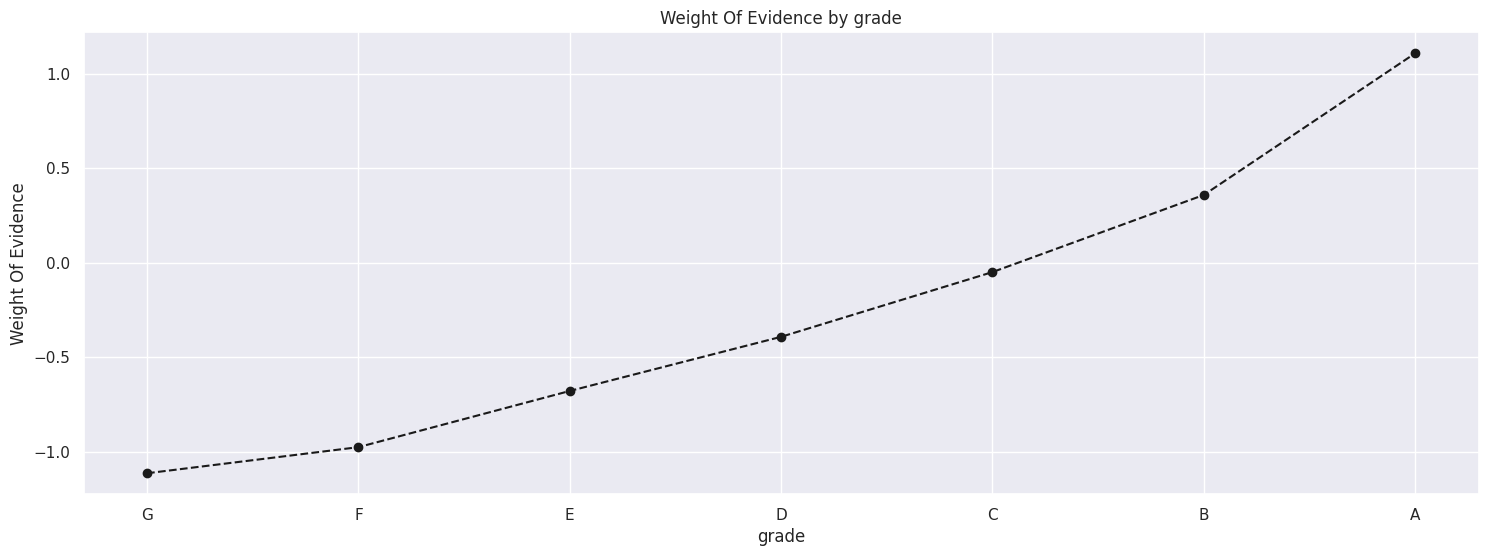

In [66]:
plot_by_woe(df_temp)